In [31]:
# Imports
import numpy as np
from numpy.lib.arraysetops import unique
from scipy.sparse import lil_matrix, csr_matrix
from scipy.sparse import linalg 
from scipy.sparse.linalg import spsolve

In [34]:
# Import repository
! git clone https://gitlab.com/jan.zeman4/d32mhm2_en.git git
! mv git/* . # copy to current directory
! rm -fr git/ # cleanup 

Cloning into 'git'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 37 (delta 14), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (37/37), done.


In [37]:
# Local functions
from show import show
from data import u_D, g, f
from stima import stima3, stima4

In [38]:
# Load all data
coordinates = np.loadtxt ( 'coordinates.dat', comments = '%' )
elements3 = np.loadtxt( 'elements3.dat', dtype = 'int', comments = '%' )
elements4 = np.loadtxt( 'elements4.dat', dtype = 'int', comments = '%' ) 
neumann = np.loadtxt( 'neumann.dat', dtype = 'int', comments='%' )
dirichlet = np.loadtxt( 'dirichlet.dat', dtype = 'int', comments = '%' )

In [39]:
# delete first columns from coordinates, elements3, elements4, and neumann arrays
coordinates = np.delete( coordinates, 0, 1 )
elements3 = np.delete( elements3, 0, 1 )
elements4 = np.delete( elements4, 0, 1 )
neumann = np.delete( neumann, 0, 1 )
dirichlet = np.delete( dirichlet, 0, 1 )

In [40]:
# setup matrices
FreeNodes = np.setdiff1d( range( coordinates.shape[0]), np.unique( dirichlet ) )
A = lil_matrix( np.zeros( (coordinates.shape[0], coordinates.shape[0]) ) ) 
b = np.zeros( (coordinates.shape[0], 1) )  
u = np.zeros( (coordinates.shape[0], 1) ) 

In [41]:
# assembly of stiffness matrices and volume forces (triangular elements)
for j in range( elements3.shape[0] ):
  A[ np.ix_( elements3[j, ], elements3[j, ] ) ] += stima3( coordinates[ elements3[ j, ], ] )  
  b[ elements3[j, ] ] += f( np.sum( coordinates[elements3[j, ], ], axis = 0) / 3.) * \
    np.linalg.det( np.block( [ [1, 1, 1], [ np.transpose( coordinates[ elements3[j, ], ] ) ] ] ) ) / 6.

In [42]:
# assembly of stiffness matrices and volume forces (quad elements)
for j in range( elements4.shape[0] ):
  A[ np.ix_( elements4[j, ], elements4[j, ] ) ] += stima4( coordinates[ elements4[ j, ], ] )
  b[ elements4[j, ] ] += f( np.sum( coordinates[elements4[j, ], ], axis = 0) / 4.) * \
    np.linalg.det( np.block( [ [1, 1, 1], [ np.transpose( coordinates[ elements4[j, 0:3], ] ) ] ] ) ) / 4.

In [43]:
# Neumann conditions
for j in range ( neumann.shape[0] ):
  b[ neumann[j, ] ] += g( np.sum( coordinates[neumann[j, ], ], axis = 0) / 2 ) * \
    np.linalg.norm( coordinates[ neumann[j, 1], ] - coordinates[ neumann[j, 0], ] )

# Dirichlet conditions 
u[ np.unique( dirichlet ) ] +=  u_D( coordinates[ np.unique( dirichlet ), ] )

In [44]:
# computation of the solution
b = b - A*u
u[FreeNodes, 0] = spsolve( A[ np.ix_( FreeNodes, FreeNodes) ].tocsr(), b[ FreeNodes, 0] )

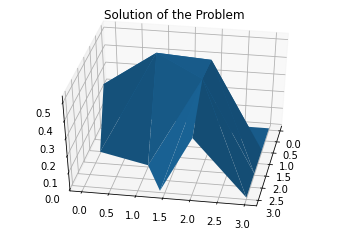

In [45]:
# graphic representation
show(elements3,elements4, coordinates, u)

In [46]:
u

array([[0.        ],
       [0.32629744],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.32629744],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.52414286],
       [0.50603572],
       [0.52414286]])